# Hotel Reservation

# The dataset contains information about hotel reservations. The goal is to predict whether a booking will be cancelled or not.
  Link : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset    

## Problem Definition
    - Predict whether a booking will be cancelled or not.
       
## Data
    - The dataset contains 32 columns and 119390 rows.

## Data Preprocessing
    - Drop unnecessary columns
    - Change the data type of some columns
    - Handle missing values
    - Handle categorical variables
    - Handle outliers
    - Feature scaling
    - Feature engineering

## Exploratory Data Analysis (EDA) & Data Visualization
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
    - Data Visualization
    
## Data Splitting
    - Split the data into training and testing sets
    
## Model Building
    - Logistic Regression
    - Random Forest
    - XGBoost
    - LightGBM
    - CatBoost
    
## Model Training
    - Train the models on the training set
    - Hyperparameter tuning : GridSearchCV or RandomizedSearchCV
    
## Model Evaluation
    - Evaluate the models on the testing set
    - Compare the models' performance using accuracy, precision, recall, f1-score, ROC-AUC, etc.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [25]:
df = pd.read_csv('Hotel Reservations.csv')

In [26]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [27]:
df.shape

(36275, 19)

## Data Preprocessing

In [28]:
# Drop unnecessary columns
df.drop(columns=['Booking_ID'], inplace=True)

## Exploratory Data Analysis (EDA) & Data Visualization

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [31]:
df.booking_status = df.booking_status.apply(lambda x: 1 if x == 'Not_Canceled' else 0)


target_feature = 'booking_status'
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Categorical Features:', categorical_features)


Categorical Features: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [32]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.query('no_of_adults == 0 & no_of_children == 0')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


## DATA VISUALIZATION

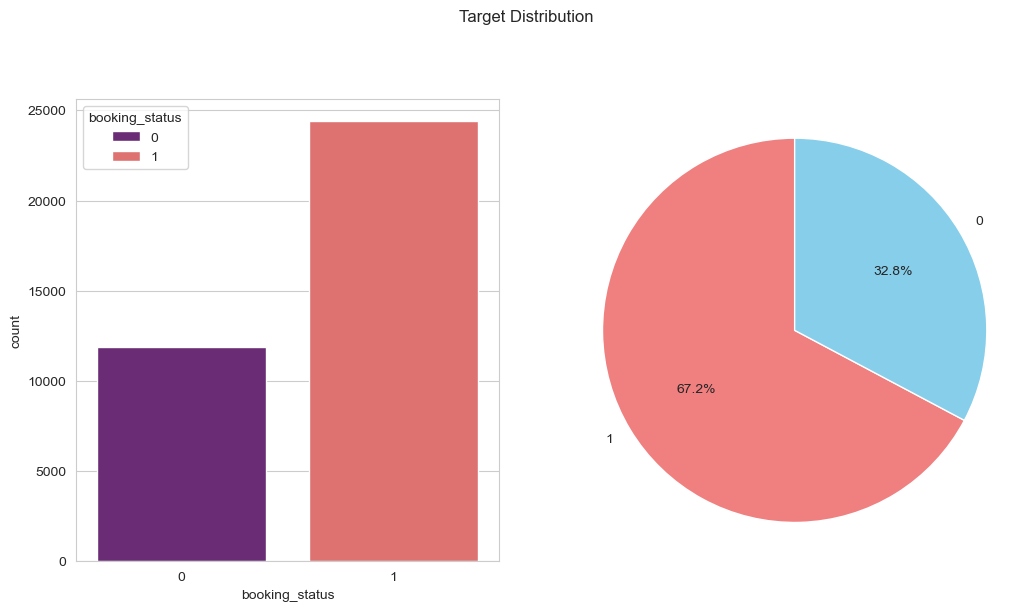

In [35]:
# target distribution : countplot , pie chart

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x=target_feature, palette='magma' , hue=target_feature)
bar_labels = df[target_feature].value_counts()


plt.subplot(1, 2, 2)
plt.pie(bar_labels, labels=bar_labels.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.axis('equal')

plt.suptitle('Target Distribution', y=1.03)

plt.show()


In [36]:
corr = df[numerical_features].corr()['booking_status'].sort_values(ascending=False)
corr

booking_status                          1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
Name: booking_status, dtype: float64

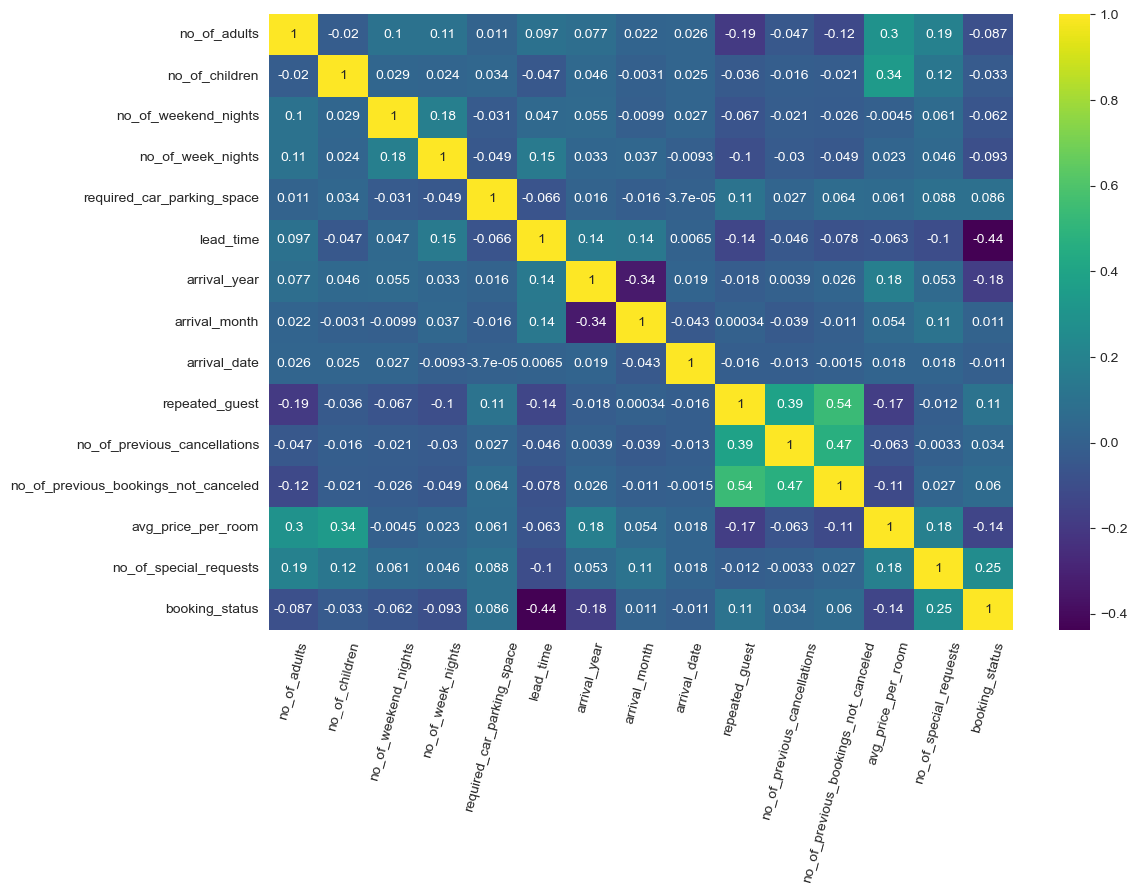

In [37]:
# Heatmap numerical features

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='viridis')
plt.xticks(rotation=75)
plt.show()

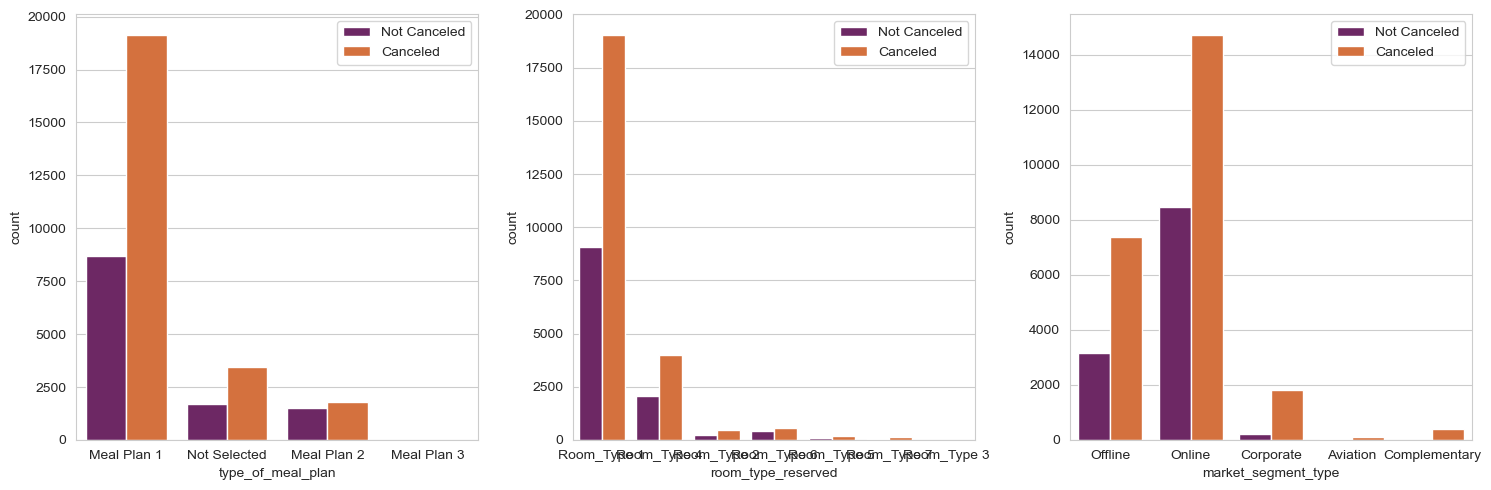

In [38]:
# Countplot categorical features
plt.figure(figsize=(15, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=feature, hue='booking_status', palette='inferno')
    plt.legend(['Not Canceled', 'Canceled'])
    plt.tight_layout()
    
plt.show()

In [39]:
# Pairplot numerical features
#sns.pairplot(df[numerical_features], hue='booking_status', palette='viridis')


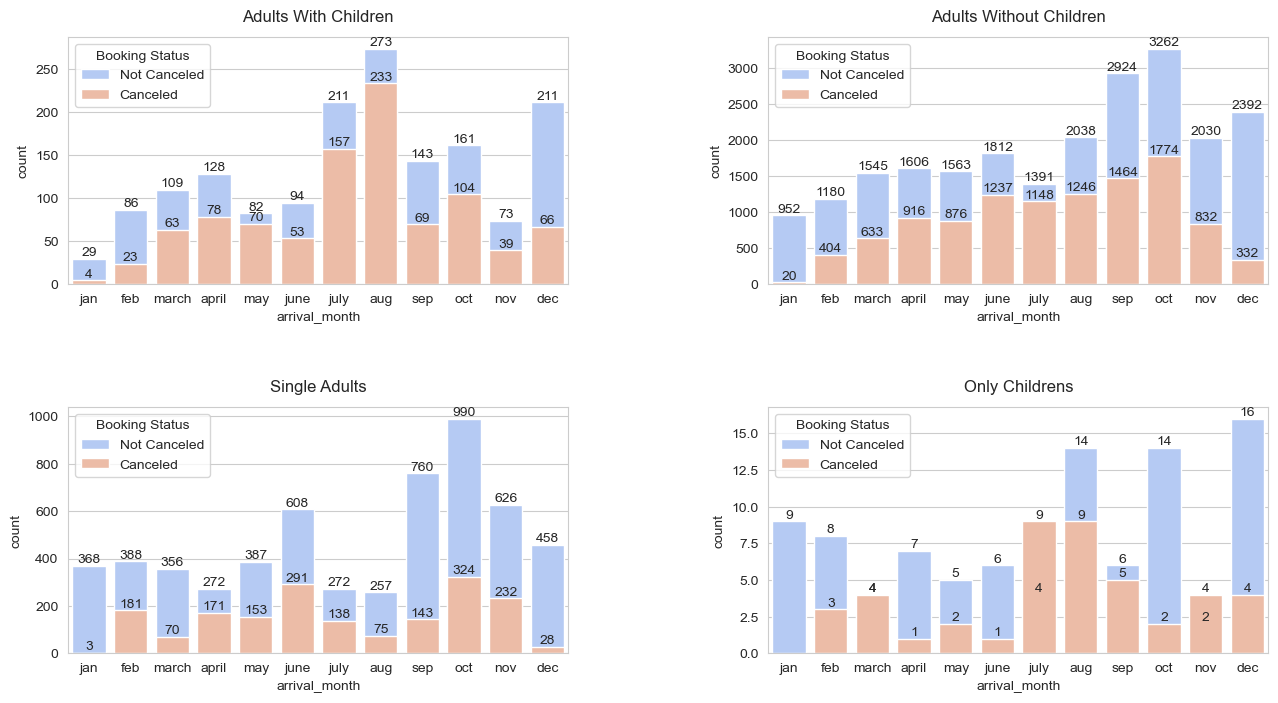

In [40]:
plt.figure(figsize = (15,8))
months = ['jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec']
titles = [
    'Adults With Children',
    'Adults Without Children',
    'Single Adults',
    'Only Childrens'
]
queries = [
    'no_of_adults != 0 & no_of_children != 0',
    'no_of_adults != 0 & no_of_children ==0',
    'no_of_adults == 1 & no_of_children ==0',
    'no_of_adults == 0 & no_of_children !=0'
]
for i,q in enumerate(queries):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data = df.query(q),x = 'arrival_month',hue = 'booking_status',hue_order=[1,0],palette = 'coolwarm',dodge = False)
    ax.bar_label(ax.containers[0],size = 10)
    ax.bar_label(ax.containers[1],size = 10)
    plt.legend(['Not Canceled','Canceled'],loc = 'upper left',title = 'Booking Status')
    plt.xticks(ticks = np.arange(0,12),labels = months)
    plt.title(titles[i],y = 1.03)

plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.5)
plt.show()

In [41]:
print(len(numerical_features) , len(categorical_features))

15 3


## Univariate Analysis 

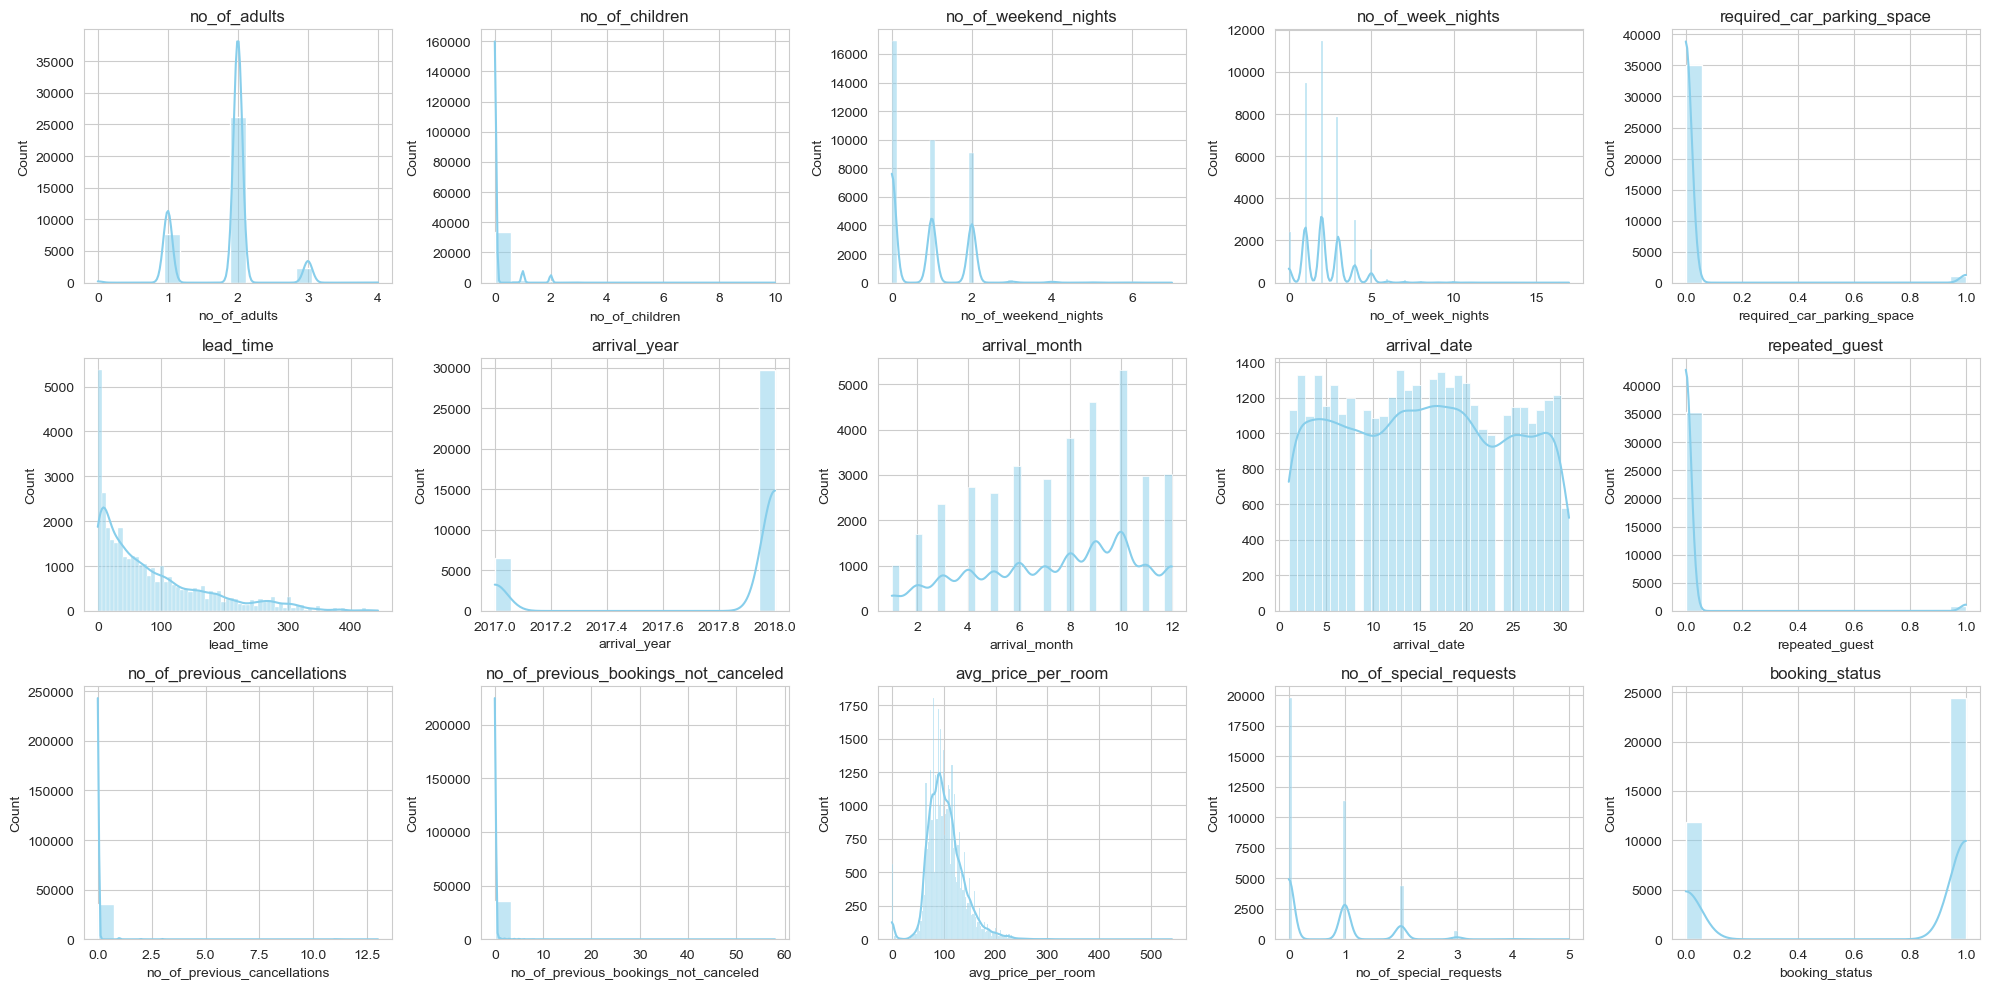

In [42]:
# Histogram numerical features
plt.figure(figsize=(20, 10))

for i, feature in enumerate(numerical_features):
    plt.subplot(3, 5, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(feature)
    
plt.tight_layout()

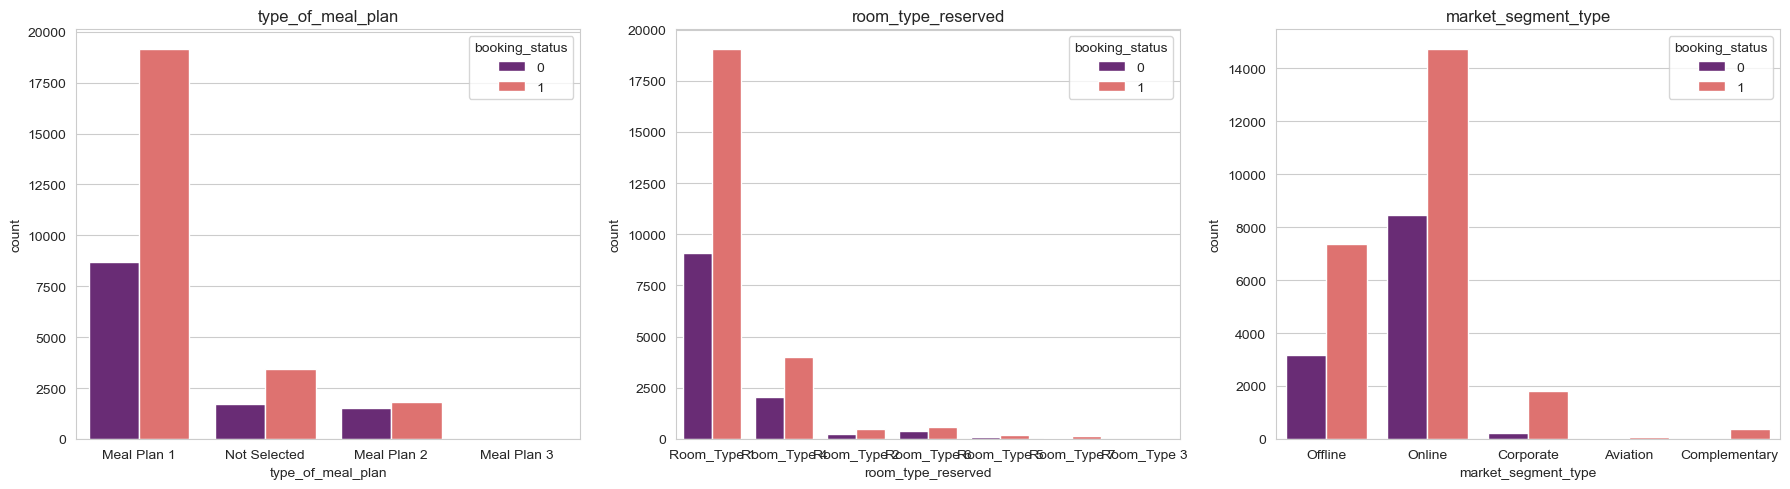

In [43]:
# histogram categorical features

plt.figure(figsize=(30, 5))

for i, feature in enumerate(categorical_features):
    plt.subplot(1, 5, i+1)
    sns.countplot(data=df, x=feature, palette='magma' , hue=target_feature )
    plt.title(feature)
    
plt.tight_layout()

## Bivariate Analysis 

In [44]:
def boxplot(x,y,xlabel,ylabel):
    ax = sns.boxplot(x = x,y= y,hue = 'booking_status',hue_order = [1,0],data = df,palette = 'coolwarm')
    plt.legend(loc = 'upper right')
    ax.legend_.texts[0].set_text('Not Canceled')
    ax.legend_.texts[1].set_text('Canceled')
    ax.legend_.set_title('Booking Status')
    plt.xlabel(xlabel,labelpad = 12,size = 12)
    plt.ylabel(ylabel,labelpad = 12,size = 12)



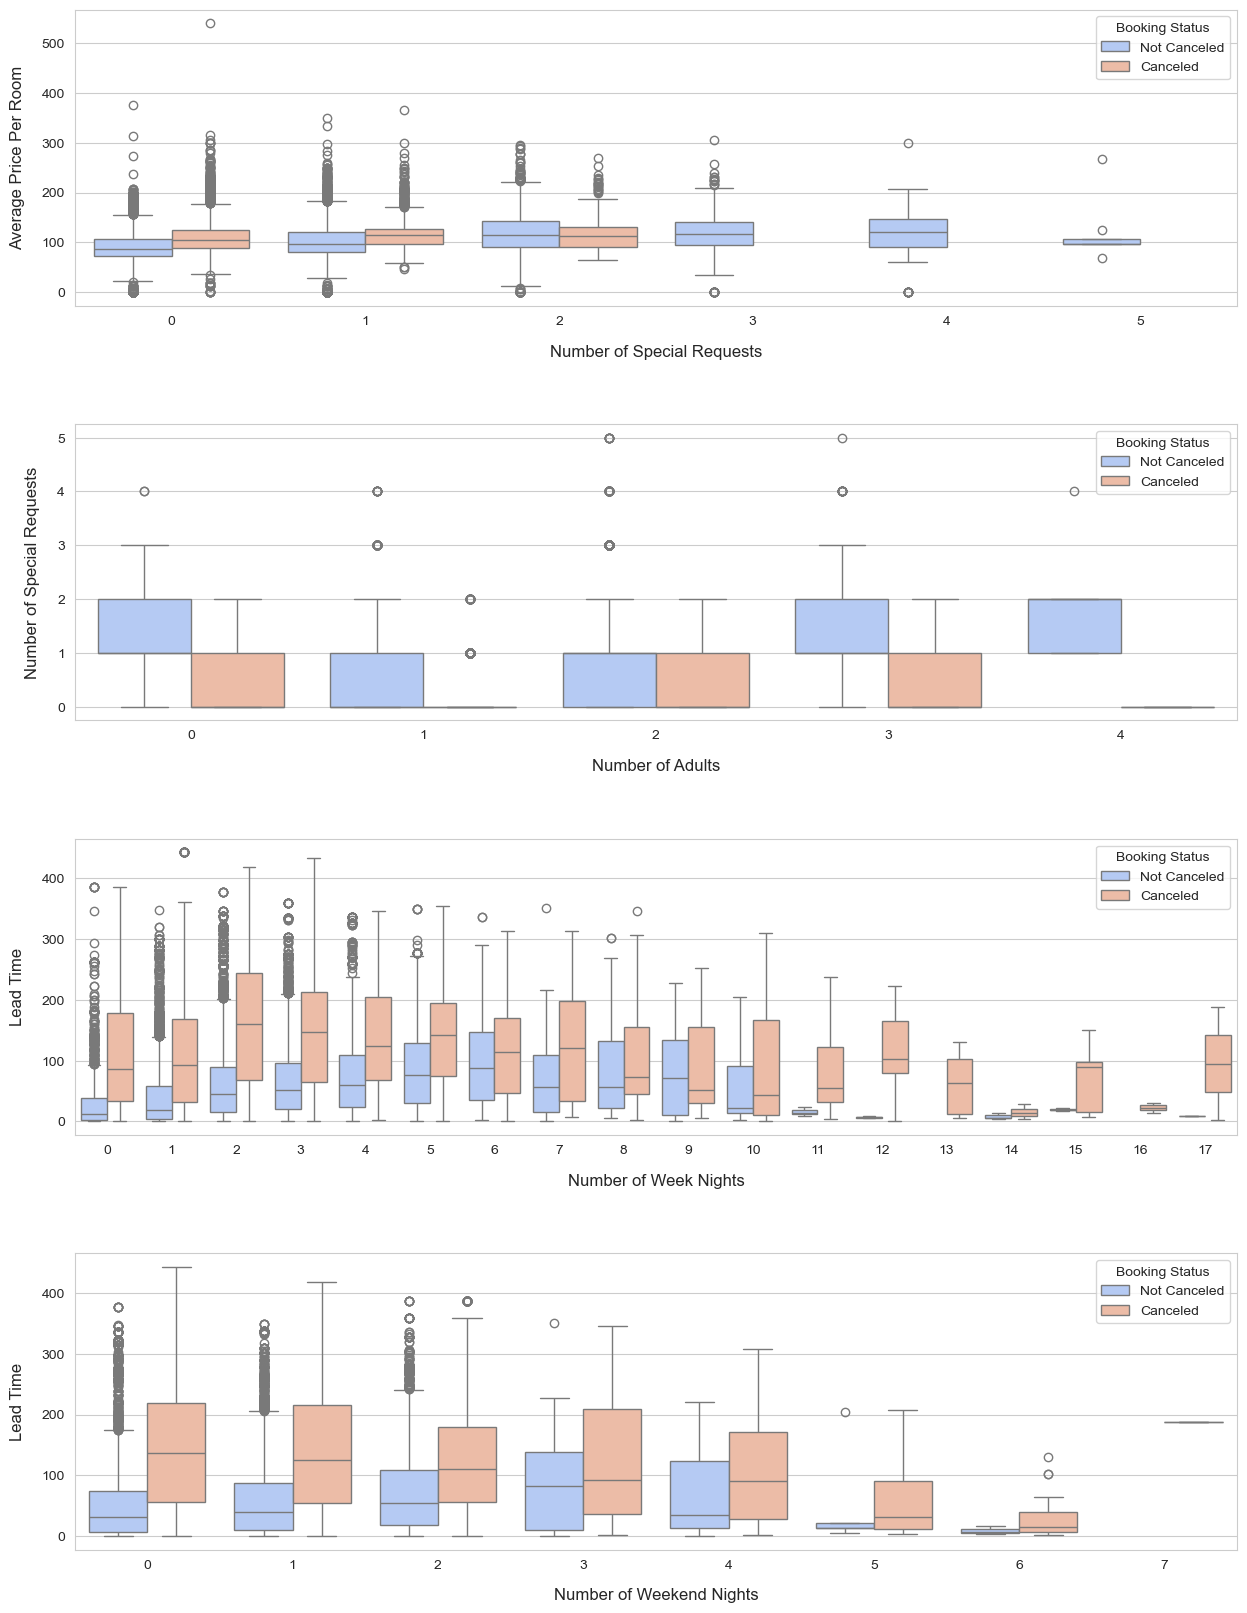

In [45]:
plt.figure(figsize = (15,20))

plt.subplot(4,1,1)
boxplot(x = 'no_of_special_requests',y = 'avg_price_per_room',xlabel = 'Number of Special Requests',ylabel = 'Average Price Per Room')

plt.subplot(4,1,2)
boxplot(x = 'no_of_adults',y = 'no_of_special_requests',xlabel = 'Number of Adults',ylabel = 'Number of Special Requests')

plt.subplot(4,1,3)
boxplot(x = 'no_of_week_nights',y = 'lead_time',xlabel = 'Number of Week Nights',ylabel = 'Lead Time')

plt.subplot(4,1,4)
boxplot(x = 'no_of_weekend_nights',y = 'lead_time',xlabel = 'Number of Weekend Nights',ylabel = 'Lead Time')

plt.subplots_adjust(wspace =0.4,hspace = 0.4)
plt.show()

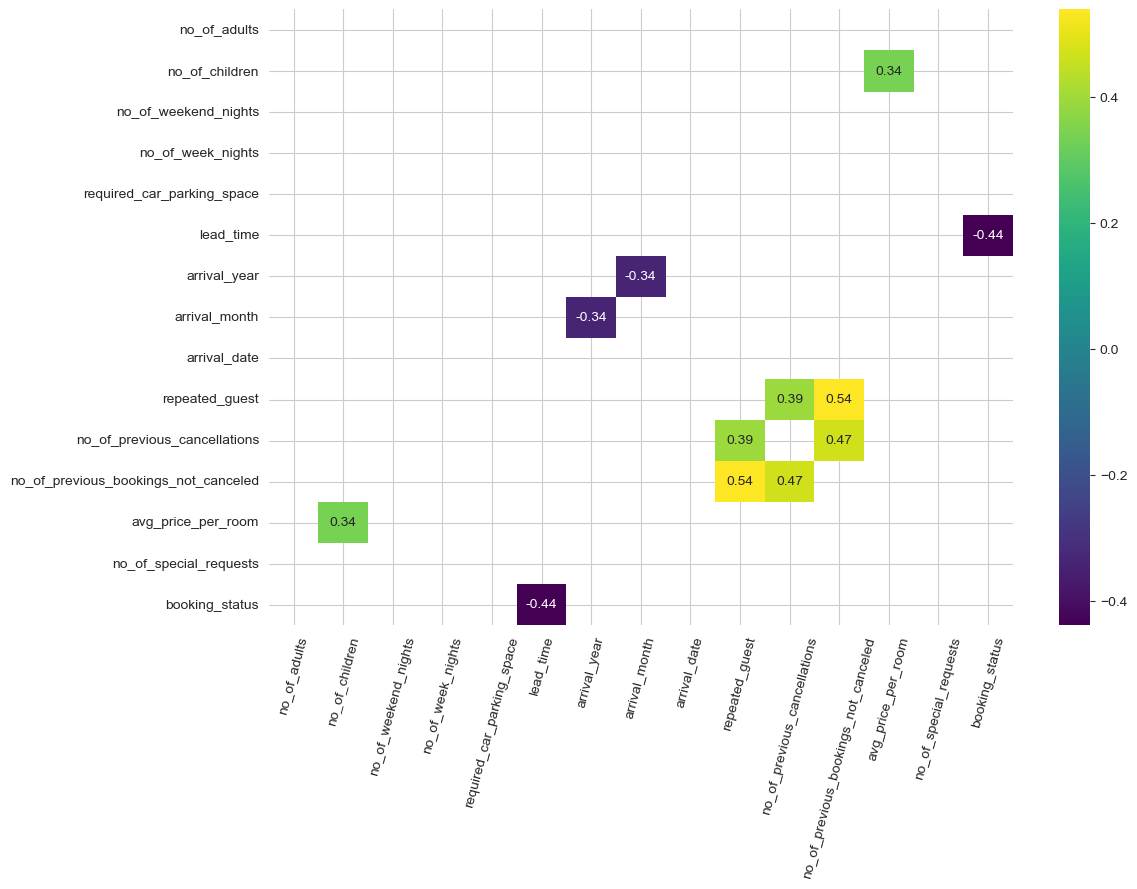

In [46]:

corr2 = df[numerical_features].corr()[numerical_features]

# heatmap
threshold = 0.3


corr2 = corr2[((corr2 >= threshold) | (corr2 <= -threshold)) & (corr2 != 1)]

plt.figure(figsize=(12, 8))

sns.heatmap(corr2, annot=True, cmap='viridis')
plt.xticks(rotation=75)
plt.yticks(rotation=0)

plt.show()

In [47]:
## corr2 de nan olmayanları anahtar değer yap 

bivaritaes = []

for i in range(len(corr2)):
    for j in range(len(corr2.columns)):
        if not np.isnan(corr2.iloc[i, j]):
            bivaritaes.append((corr2.index[i], corr2.columns[j], corr2.iloc[i, j]))
            
bivaritaes


[('no_of_children', 'avg_price_per_room', 0.33772791390585877),
 ('lead_time', 'booking_status', -0.4385379185883124),
 ('arrival_year', 'arrival_month', -0.33968892363437436),
 ('arrival_month', 'arrival_year', -0.33968892363437436),
 ('repeated_guest', 'no_of_previous_cancellations', 0.3908100234493489),
 ('repeated_guest',
  'no_of_previous_bookings_not_canceled',
  0.5391559433416986),
 ('no_of_previous_cancellations', 'repeated_guest', 0.3908100234493489),
 ('no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  0.46814683285504366),
 ('no_of_previous_bookings_not_canceled',
  'repeated_guest',
  0.5391559433416986),
 ('no_of_previous_bookings_not_canceled',
  'no_of_previous_cancellations',
  0.46814683285504366),
 ('avg_price_per_room', 'no_of_children', 0.33772791390585877),
 ('booking_status', 'lead_time', -0.4385379185883124)]

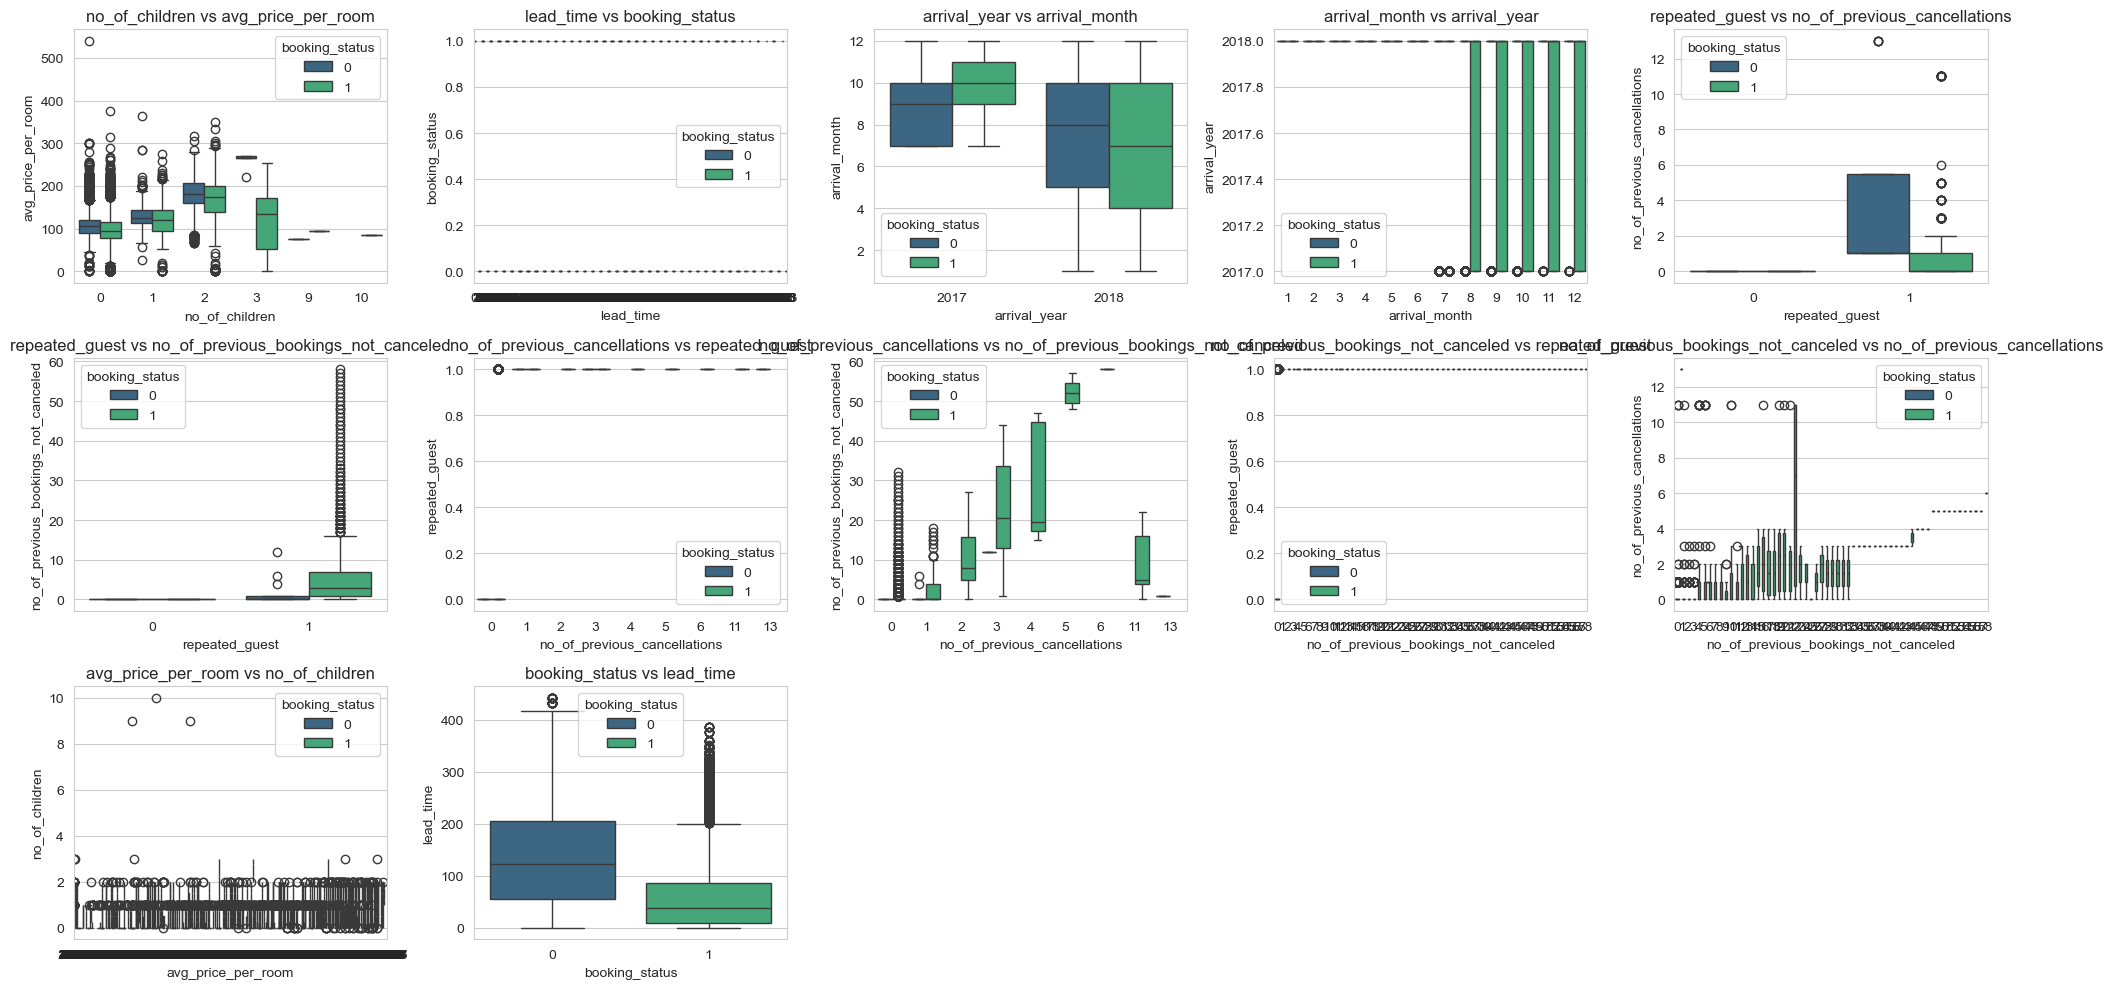

In [48]:
# boxplot bivariates

plt.figure(figsize=(20, 10))

for i, (feature1, feature2, _) in enumerate(bivaritaes):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=df, x=feature1, y=feature2, hue=target_feature, palette='viridis')
    plt.title(f'{feature1} vs {feature2}')
    
plt.tight_layout()


# Creating Independent and Dependent Variables

In [54]:
X = df.drop(columns='booking_status').values
y = df['booking_status'].values

In [57]:
X.shape, y.shape

((36275, 17), (36275,))

## Data Splitting & Feature Scaling (Label Encoding)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categorical_features:
    X[:, df.columns.get_loc(feature)] = le.fit_transform(X[:, df.columns.get_loc(feature)])
    

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier().fit(X_train, y_train)

In [62]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(
    estimator = xgb, param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]}, 
    cv = 5, n_jobs = -1, verbose = 2, scoring = 'accuracy')

In [63]:
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [64]:
print('Best Parameters\t:',gridSearch.best_params_)
print('Best Score\t:',round(gridSearch.best_score_,3))

Best Parameters	: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score	: 0.886


In [66]:
# fit the model with best parameters
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1).fit(X_train, y_train)
y_pred = xgb.predict(X_test)

## Model Evaluation

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

acc = round(accuracy_score(y_pred,y_test),3)
pre = round(precision_score(y_pred,y_test),3)
rec = round(recall_score(y_pred,y_test),3)
print(f'Accuracy Score\t: {acc}\nPrecision Score\t: {pre}\nRecall Score\t: {rec}')

Accuracy Score	: 0.888
Precision Score	: 0.939
Recall Score	: 0.898


In [68]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred),end='\n\n')
print('Classificaion Report'.center(70),'\n\n',classification_report(y_test,y_pred))

Confusion Matrix:
 [[1900  516]
 [ 294 4545]]

                         Classificaion Report                          

               precision    recall  f1-score   support

           0       0.87      0.79      0.82      2416
           1       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255

